In [ ]:
!pip install transformers
!pip install tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!nvidia-smi
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Mar 17 21:40:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


## Initialize google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
root_dir = "/content/gdrive/My Drive/dna_seq/"

##Data Preprocessing

In [ ]:
# from tqdm.auto import tqdm

# data_non = f"/{root_dir}/cleaned_non_patho_data.txt"
# non_patho = pd.read_csv(data_non, sep=';', header=None)

# data_patho = f"/{root_dir}/cleaned_patho_data.txt"
# patho = pd.read_csv(data_patho, sep=';', header=None)

# def write_spaced_data(df ,path_clean):
#   for i in tqdm(range(0,len(df[0]))):
#     name = df[0][i]
#     data = split_dna_into_4letter_words(df[1][i],' ')
#     data_content = f"{name};{data}\n"
#     path_clean.write(data_content)

# path_clean = open(f"/{root_dir}/cleaned_non_patho_data_word.txt",'w')
# write_spaced_data(non_patho,path_clean)

# path_clean = open(f"/{root_dir}/cleaned_patho_data_word.txt",'w')
# write_spaced_data(patho,path_clean)


### Get dataframe for patho and non-patho

In [ ]:
import pandas as pd
data = f"/{root_dir}/cleaned_non_patho_data_word.txt"
non_patho = pd.read_csv(data, sep=';', header=None)

data = f"/{root_dir}/cleaned_patho_data_word.txt"
patho = pd.read_csv(data, sep=';', header=None)


### Create corpus for dna seq with 4 letter word each (Do not run)


In [ ]:
def split_dna_into_4letter_words(current_seq,split_delimiter):
  seq_len = len(current_seq)
  sample = []
  for i in range(0,seq_len,4):
    w = current_seq[i:i+4]
    sample.append(w)
  return split_delimiter.join(sample)


In [ ]:
non_patho[1][17999].replace(' ', '\n') 

'gtgg\nggtt\nggcg\nggtg\nctat\nacat\ngcaa\ngtcg\naacg\naact\nctgg\ntatt\ngatt\nggtg\ncttg\ncatc\natga\nttta\ncatt\ntgag\ntgag\ntggc\ngaac\ntggt\ngagt\naaca\ncgtg\nggaa\nacct\ngccc\nagaa\ngcgg\nggga\ntaac\nacct\nggaa\nacag\natgc\ntaat\naccg\ncata\nacaa\ncttg\ngacc\ngcat\nggtc\ncgag\ntttg\naaag\natgg\ncttc\nggct\natca\ncttt\ntgga\ntggt\ncccg\ncggc\ngtat\ntagc\ntaga\ntggt\ngagg\ntaac\nggct\ncacc\natgg\ncaat\ngata\ncgta\ngccg\nacct\ngaga\ngggt\naatc\nggcc\nacat\ntggg\nactg\nagac\nacgg\nccca\naact\nccta\ncggg\naggc\nagca\ngtag\nggaa\ntctt\nccac\naatg\ngacg\naaag\ntctg\natgg\nagca\nacgc\ncgcg\ntgag\ntgaa\ngaag\nggtt\ntcgg\nctcg\ntaaa\nactc\ntgtt\ngtta\naaga\nagaa\ncata\ntctg\nagag\ntaac\ntgtt\ncagg\ntatt\ngacg\ngtat\nttaa\nccag\naaag\nccac\nggct\naact\nacgt\ngcca\ngcag\nccgc\nggta\natac\ngtag\ngtgg\ncaag\ncgtt\ngtcc\nggat\nttat\ntggg\ncgta\naagc\ngagc\ngcag\ngcgg\ntttt\nttaa\ngtct\ngatg\ntgaa\nagcc\ntttc\nggct\ncaac\ncgaa\ngaag\ntgca\ntcgg\naaac\ntggg\naaac\nttga\ngtgc\nagaa\naagg\nacag\ntgg

In [ ]:
## create corpus of dna with 4letter word size
from tqdm.auto import tqdm
def create_corpus(data):
  text_data = []
  file_count = 0
  for i in tqdm(range(0,len(data[0]))):
    sample = data[1][i]
    # sample = data[1][i].replace(' ', '\n')
    text_data.append(sample)
    if len(text_data) == 10_000:
      # once we git the 10K mark, save to file
      with open(f'{root_dir}/dna_corpus/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
          fp.write('\n'.join(text_data))
      text_data = []
      file_count += 1
  # after saving in 10K chunks, we will have ~2082 leftover samples, we save those now too
  with open(f'{root_dir}/dna_corpus/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(text_data))


create_corpus(non_patho)
create_corpus(patho)

# f = open("/content/gdrive/My Drive/dna_seq_data/.txt",'w')
# for i in range(0,len(non_patho[1])):
#   current_name = non_patho[0][i]
#   current_seq = non_patho[1][i]
#   tok = tokenized_sequence(current_seq,dyn_vocab)
#   f.write(current_name + ";" + "0" + ";"  + str(tok) + "\n")


  0%|          | 0/22707 [00:00<?, ?it/s]

  0%|          | 0/18909 [00:00<?, ?it/s]

In [ ]:
# get paths of corpus
from pathlib import Path
paths = [str(x) for x in Path(f'{root_dir}/dna_corpus').glob('**/text*.txt')]
paths

['/content/gdrive/My Drive/sathya_dna_seq/dna_corpus/text_2.txt',
 '/content/gdrive/My Drive/sathya_dna_seq/dna_corpus/text_1.txt',
 '/content/gdrive/My Drive/sathya_dna_seq/dna_corpus/text_0.txt']

In [ ]:
# Count the vocab in our dna corpus
vocab = {}
for path in paths:
  fh = open(path,'r')
  for line in fh:
    word = line.strip()
    vocab[word] = 1

vocab_length = len(vocab)
print(vocab_length)

21615


### Tokenize corpus and save the vocab and tokenized corpus (Do not run)

In [ ]:
## Create tokens for above dna corpus

from tokenizers import ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer()
tokenizer.train(files=paths, vocab_size=vocab_length, min_frequency=2,
                special_tokens=['<s>', '<pad>', '</s>', '<unk>', '<mask>'])
tokenizer.save_model(f'{root_dir}/dna_corpus')

['/content/gdrive/My Drive/sathya_dna_seq//dna_corpus/vocab.json',
 '/content/gdrive/My Drive/sathya_dna_seq//dna_corpus/merges.txt']

In [ ]:
# initialize tokenizer with our corpus and vocab created using Tokenizer above
from tokenizers import ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer.from_file(vocab_filename=f"{root_dir}/dna_corpus/vocab.json", 
                                  merges_filename=f"{root_dir}/dna_corpus//merges.txt")

In [ ]:
tokens = tokenizer.encode('actg attg gttc nnnn')
print(tokens.sequence_ids,tokens.ids)

[0, 0, 0, 0] [857, 454, 568, 587]


## Create Data pipeline

In [ ]:
## initialize the tokenizer
from tokenizers import ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer.from_file(vocab_filename=f"{root_dir}/dna_corpus/vocab.json", 
                                  merges_filename=f"{root_dir}/dna_corpus//merges.txt")

tokenizer.enable_truncation(max_length=5200)
tokenizer.enable_padding()

In [ ]:
tokenizer.encode("actg gtac gtat")

Encoding(num_tokens=3, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

18909 22707


(1409.815984236832, 499, 2986, 2986, 18864)

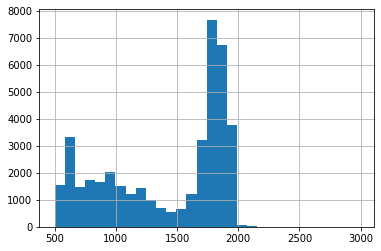

In [ ]:
# Combine data from both and encode all our sample data.
samples = pd.concat([patho, non_patho])
# batch = tokenizer.encode_batch(samples[1])
print(len(patho),len(non_patho))

max_len = 0
max_index = 0
max_dna = ""
for index,i in enumerate(samples[1]):
  if max_len < len(i):
    max_len = len(i)
    max_index = index
    max_dna = i

seq_len = [len(i) for i in samples[1]]
pd.Series(seq_len).hist(bins = 30)

lens = [len(s) for s in samples[1]]
avg = sum(lens) / len(lens)
avg,min(lens),max(lens),max_len,max_index


(598.0, 598, 598)

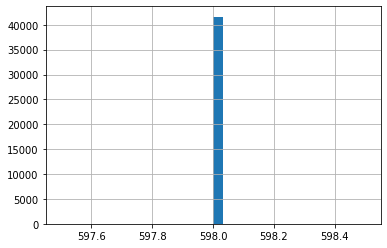

In [ ]:
batch = tokenizer.encode_batch(samples[1])
seq_len = [len(i) for i in batch]
pd.Series(seq_len).hist(bins = 30)

lens = [len(s) for s in batch]
avg = sum(lens) / len(lens)
avg,min(lens),max(lens)


In [ ]:
assert(batch[18864].tokens == tokenizer.encode(max_dna).tokens)
len(max_dna.split(' '))
# tokenizer.encode(max_dna).tokens

598

In [ ]:
# convert our batch into tensors 
import torch
labels = torch.tensor([x.ids for x in batch])
mask = torch.tensor([x.attention_mask for x in batch])

In [ ]:
# make copy of labels tensor, this will be input_ids
input_ids = labels.detach().clone()
# create random array of floats with equal dims to input_ids
rand = torch.rand(input_ids.shape)
# mask random 15% where token is not 0 [PAD], 1 [CLS], or 2 [SEP]
mask_arr = (rand < .15) * (input_ids != 0) * (input_ids != 1) * (input_ids != 2)
# loop through each row in input_ids tensor (cannot do in parallel)
for i in range(input_ids.shape[0]):
    # get indices of mask positions from mask array
    selection = torch.flatten(mask_arr[i].nonzero()).tolist()
    # mask input_ids
    input_ids[i, selection] = 3  # our custom [MASK] token == 3


In [ ]:
input_ids.shape


torch.Size([41616, 598])

### Build DataLoader

In [ ]:
encodings = {'input_ids': input_ids, 'attention_mask': mask, 'labels': labels}


In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        # store encodings internally
        self.encodings = encodings

    def __len__(self):
        # return the number of samples
        return self.encodings['input_ids'].shape[0]

    def __getitem__(self, i):
        # return dictionary of input_ids, attention_mask, and labels for index i
        return {key: tensor[i] for key, tensor in self.encodings.items()}

In [ ]:
dataset = Dataset(encodings)

In [ ]:
loader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)


## Train BERT Model


In [ ]:
# initialize the model with the config
from transformers import RobertaConfig

print(tokenizer.get_vocab_size())
# assert 21615 == tokenizer.get_vocab_size()

config = RobertaConfig(
    vocab_size=tokenizer.get_vocab_size(),  # we align this to the tokenizer vocab_size
    max_position_embeddings=1200,
    hidden_size=768,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1
)

2163


In [ ]:
from transformers import RobertaForMaskedLM
from transformers import AdamW

model = RobertaForMaskedLM(config)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# and move our model over to the selected device
model.to(device)


# activate training mode
model.train()
# initialize optimizer
optim = AdamW(model.parameters(), lr=1e-4)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
model

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(2163, 768, padding_idx=1)
      (position_embeddings): Embedding(1200, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNor

### Training 

In [ ]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(f"{root_dir}/logging_dir")


In [ ]:
from tqdm.auto import tqdm
epochs = 2

for epoch in range(epochs):
    # setup loop with TQDM and dataloader
    loop = tqdm(loader, leave=True)
    for bi,batch in enumerate(loop):
        # initialize calculated gradients (from prev step)
        optim.zero_grad()
        # pull all tensor batches required for training
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        # process
        outputs = model(input_ids, attention_mask=attention_mask,
                        labels=labels)
        # extract loss
        loss = outputs.loss
        # calculate loss for every parameter that needs grad update
        loss.backward()
        # update parameters
        optim.step()
        # print relevant info to progress bar
        writer.add_scalar("Loss/train", loss, bi)
        loop.set_description(f'Epoch {epoch}')
        loop.set_postfix(loss=loss.item())
    writer.flush()
writer.close()

  0%|          | 0/2601 [00:00<?, ?it/s]

  0%|          | 0/2601 [00:00<?, ?it/s]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir f'{root_dir}/logging_dir'

In [ ]:
model.save_pretrained(f'{root_dir}/dnaBerTo_1200')  # and don't forget to save filiBERTo!

## Testing trained model

In [ ]:
print(samples[1][1])

1    cgtg ctta acac atgc aagt cgaa cggg tctg cctt g...
1    acga acgc tggc ggcg tgct taac acat gcaa gtcg a...
Name: 1, dtype: object


In [ ]:
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM.from_pretrained(f"{root_dir}/dnaBerTo_1200")
## initialize the tokenizer
from tokenizers import ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer.from_file(vocab_filename=f"{root_dir}/dna_corpus/vocab.json", 
                                  merges_filename=f"{root_dir}/dna_corpus//merges.txt")

tokenizer.enable_truncation(max_length=1200)
tokenizer.enable_padding()

samples = ["atgc aagt cgaa cggg tctg cctt gttt tttg cggg gtgg gtta gtgg cgaa cggg tgag taac acgt gagt aacc tgcc ","actt attg"]
# expected aagg cagg tctc tggg cagt aact gacg ctga ggag cgaa agca tggg tagc gaac agga ttag atac cctg gtag tcca tgcc gtaa
import torch
batch = tokenizer.encode_batch(samples)
labels = torch.tensor([x.ids for x in batch])
mask = torch.tensor([x.attention_mask for x in batch])
# make copy of labels tensor, this will be input_ids
input_ids = labels.detach().clone()
# create random array of floats with equal dims to input_ids
rand = torch.rand(input_ids.shape)
# mask random 15% where token is not 0 [PAD], 1 [CLS], or 2 [SEP]
mask_arr = (rand < .15) * (input_ids != 0) * (input_ids != 1) * (input_ids != 2)
# loop through each row in input_ids tensor (cannot do in parallel)
for i in range(input_ids.shape[0]):
    # get indices of mask positions from mask array
    selection = torch.flatten(mask_arr[i].nonzero()).tolist()
    # mask input_ids
    input_ids[i, selection] = 3  # our custom [MASK] token == 3
input_ids

tensor([[614, 362, 414, 344, 462, 358,   3, 539, 344, 328, 434, 328, 414, 344,
         361, 366, 456, 417, 425,   3, 225],
        [662, 454,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0]])

In [ ]:
model.eval()
model.to(device)
with torch.no_grad():
  prediction = model(input_ids.to(device), attention_mask=mask.to(device))
                        # labels=labels.to(device))

print(prediction['logits'].shape)
prediction = prediction['logits'][0].cpu()
print(prediction.shape)
pred_tok = torch.argmax(prediction, dim=-1)
print(pred_tok.shape)
print(pred_tok)
tok = pred_tok.numpy()
print(f" tok: {tok}")
predicted_text = tokenizer.decode(tok)
print(samples[0])
print(predicted_text)
# prediction = prediction['logits']
# output = torch.argmax(prediction[0]).item()
# tokenizer.decode()
# prediction = prediction[0][0].argmax(dim=-1).item()


torch.Size([2, 21, 2163])
torch.Size([21, 2163])
torch.Size([21])
tensor([614, 362, 414, 344, 462, 358, 477, 539, 344, 328, 434, 328, 414, 344,
        361, 366, 456, 417, 425, 320, 225])
 tok: [614 362 414 344 462 358 477 539 344 328 434 328 414 344 361 366 456 417
 425 320 225]
atgc aagt cgaa cggg tctg cctt gttt tttg cggg gtgg gtta gtgg cgaa cggg tgag taac acgt gagt aacc tgcc 
atgc aagt cgaa cggg tctg cctt tgat tttg cggg gtgg gtta gtgg cgaa cggg tgag taac acgt gagt aacc ggga 


In [ ]:
patho[1][0][0:100],patho[1][0][100:200]

('atgc aagt cgaa cggg tctg cctt gttt tttg cggg gtgg gtta gtgg cgaa cggg tgag taac acgt gagt aacc tgcc ',
 'cctc actt ctgg ataa ccgc ttga aagg gtgg ctaa tacg gggt gttc tggc tgtg ccgc atgg tgtg gctg ggaa agat ')

## Fine Tune dnaBerTo model for patho/non-patho classification (Do not run , Moved to new notebook)

In [ ]:
## Refer to https://www.analyticsvidhya.com/blog/2020/07/transfer-learning-for-nlp-fine-tuning-bert-for-text-classification/

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from tokenizers import ByteLevelBPETokenizer
tokenizer = ByteLevelBPETokenizer.from_file(vocab_filename=f"{root_dir}/dna_corpus/vocab.json", 
                                  merges_filename=f"{root_dir}/dna_corpus//merges.txt")
tokenizer.enable_truncation(max_length=512)
tokenizer.enable_padding()

import pandas as pd
data = f"/{root_dir}/cleaned_non_patho_data_word.txt"
non_patho = pd.read_csv(data, sep=';', header=None)

data = f"/{root_dir}/cleaned_patho_data_word.txt"
patho = pd.read_csv(data, sep=';', header=None)

# split train dataset into train, validation and test sets
# Combine data from both and encode all our sample data.
patho['label'] = 1
non_patho['label'] = 0
samples = pd.concat([patho, non_patho])
# batch = tokenizer.encode_batch(samples[1])

# print(len(patho),len(non_patho))

train_text, temp_text, train_labels, temp_labels = train_test_split(samples[1], samples['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=samples['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)


In [ ]:
# sample data
text = "atgc aagt cgaa cggg tctg cctt gttt tttg cggg gtgg gtta gtgg cgaa cggg tgag taac acgt gagt aacc tgcc"

# encode text
sent_id = tokenizer.encode(text)

# output
print(sent_id.ids)
tokenizer.decode(sent_id.ids)

[614, 362, 414, 344, 462, 358, 552, 539, 344, 328, 434, 328, 414, 344, 361, 366, 456, 417, 425, 376]


'atgc aagt cgaa cggg tctg cctt gttt tttg cggg gtgg gtta gtgg cgaa cggg tgag taac acgt gagt aacc tgcc'

<AxesSubplot:>

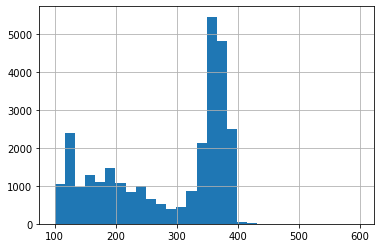

In [ ]:
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins = 30)

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.encode_batch(
    train_text.tolist(),
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.encode_batch(
    val_text.tolist(),
    
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.encode_batch(
    test_text.tolist(),
)

In [ ]:
## convert lists to tensors

train_seq = torch.tensor([x.ids for x in tokens_train])
train_mask = torch.tensor([x.attention_mask for x in tokens_train])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor([x.ids for x in tokens_val])
val_mask = torch.tensor([x.attention_mask for x in tokens_val])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor([x.ids for x in tokens_test])
test_mask = torch.tensor([x.attention_mask for x in tokens_test])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
import torch.nn as nn
class DnaPathoBERT(nn.Module):

    def __init__(self, bert):
      
      super(DnaPathoBERT, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      # preds = self.bert(sent_id, attention_mask=mask,labels=sent_id)
      # preds = torch.argmax(preds['logits'], axis = -1).float()
      # print(f'bert shape: {preds.shape}')
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      x = self.fc1(cls_hs)
      x = self.fc1(preds)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
from transformers import RobertaForMaskedLM
from transformers import AdamW

from transformers import RobertaConfig
vocab_length = 21615
config = RobertaConfig(
    vocab_size=vocab_length,  # we align this to the tokenizer vocab_size
    max_position_embeddings=514,
    hidden_size=768,
    num_attention_heads=12,
    num_hidden_layers=6,
    type_vocab_size=1
)

# pass the pre-trained BERT to our define architecture
dna_base_model = RobertaForMaskedLM.from_pretrained(f"{root_dir}/dnaBerTo",config=config)

# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# and move our model over to the selected device
# dna_base_model.to(device)

# dna_base_model.to(device)

In [ ]:
dna_base_model.config.output_hidden_states=True

# from transformers import RobertaConfig
# model_name = 'roberta-base'
# new_model = RobertaForMaskedLM.from_pretrained(model_name, config=dna_base_model.config,ignore_mismatched_sizes=True)
# new_model.roberta = dna_base_model.roberta # Copy the weights from the original model
# new_model.num_labels = 0
# new_model.classifier = None

# dna_base_model.config.num_attention_heads
# layer_to_prune = dna_base_model.config.num_hidden_layers - 1
# heads_to_prune = list(range(dna_base_model.config.num_attention_heads))

# dna_base_model.roberta.prune_heads({layer_to_prune: heads_to_prune})

# dna_base_model.config
# new_model = RobertaForMaskedLM.from_pretrained(f"{root_dir}/dnaBerTo", config=dna_base_model.config,ignore_mismatched_sizes=True)
# new_model.roberta = dna_base_model.roberta # Copy the weights from the original model
# new_model
# dna_base_model

# dna_base_model_1 = torch.nn.Sequential(*(list(dna_base_model.children())[:-1])) 
# new_model

# layer_to_prune = dna_base_model.config.num_hidden_layers - 1
# heads_to_prune = list(range(dna_base_model.config.num_attention_heads))
# dna_base_model.roberta.prune_heads({layer_to_prune: heads_to_prune})

# dna_base_model.lm_head = torch.nn.Sequential(*(list(dna_base_model.lm_head.children())[:-1])) 
# dna_base_model.config.num_hidden_layers = dna_base_model.config.num_hidden_layers-1
# new_model = RobertaForMaskedLM.from_pretrained(model_name, config=dna_base_model.config,ignore_mismatched_sizes=True)
# new_model.roberta = dna_base_model.roberta
# dna_base_model

In [ ]:
model = DnaPathoBERT(dna_base_model)
# push the model to GPU
# model = model.to(device)

# freeze all the parameters
for param in model.bert.parameters():
    param.requires_grad = False

In [ ]:
## Test sample
text = "atgc aagt cgaa cggg tctg cctt gttt tttg cggg gtgg gtta gtgg cgaa cggg tgag taac acgt gagt aacc tgcc"\
       "<s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> "\
       "<s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> "\
       "<s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> "\
       "<s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> "\
       "<s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> "\
       "<s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> "
sent_id = tokenizer.encode(text)
ids = torch.tensor([sent_id.ids])
mask = torch.tensor([sent_id.attention_mask])
print(len(sent_id.ids))
dna_base_model.eval()

with torch.no_grad():
  preds = dna_base_model(ids,mask,ids)
  # preds = dna_base_model(ids.to(device),mask.to(device),ids.to(device))

preds
# preds = torch.argmax(preds['logits'], axis = -1).float()
# model.fc1(preds)

512


IndexError: ignored

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-4)          # learning rate


/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=[0,1], y=train_labels)

print("Class Weights:",class_weights)

Class Weights: [0.91635735 1.10044575]


In [ ]:
 #converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [ ]:
## Test the model 
for step,batch in enumerate(train_dataloader):
  # push the batch to gpu
  batch = [r.to(device) for r in batch]
  sent_id, mask, labels = batch
  _, cls_hs = model.bert(sent_id, attention_mask=mask,labels=sent_id)      
  print(cls_hs)
  break

RuntimeError: ignored

In [ ]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [ ]:
batch = val_dataloader.dataset[0:1]
batch = [t.to(device) for t in batch]
sent_id, mask, labels = batch
with torch.no_grad():
  print(sent_id.shape)
  preds = model(sent_id, mask)

torch.Size([1, 478])


RuntimeError: ignored

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')



 Epoch 1 / 10
  Batch    50  of    911.
  Batch   100  of    911.
  Batch   150  of    911.
  Batch   200  of    911.
  Batch   250  of    911.
  Batch   300  of    911.
  Batch   350  of    911.
  Batch   400  of    911.
  Batch   450  of    911.
  Batch   500  of    911.
  Batch   550  of    911.
  Batch   600  of    911.
  Batch   650  of    911.
  Batch   700  of    911.
  Batch   750  of    911.
  Batch   800  of    911.
  Batch   850  of    911.
  Batch   900  of    911.

Evaluating...


RuntimeError: ignored